In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

Saving kaggle.json to kaggle.json
 65% 43.0M/66.0M [00:00<00:00, 55.9MB/s]
100% 66.0M/66.0M [00:00<00:00, 104MB/s] 
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_curve,precision_score,recall_score,roc_auc_score,make_scorer
from matplotlib.colors import Normalize
import pandas as pd
from pandas.core.frame import DataFrame 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [14]:
def metric(y_test,y_pred):
    cm=confusion_matrix(y_test, y_pred)
    tp=cm[1][1] #vrai positifs 
    tn=cm[0][0] #vrai negatifs
    fp=cm[0][1] #faux positifs
    fn=cm[1][0] #faux negatifs
    score=(2*((tp+tn)/y_test.size) + 5*(tp/(fn+tp)))/7 #(2*accuracy + 5*rappel)/7
#     print(f"score : {score} soit {score* 100:.2f}%")
    return float(score)

In [15]:
def reg_log(X_tr,y_tr,X_ts,y_ts):
    logreg = LogisticRegression()
    logreg.fit(X_tr,y_tr)
    y_pred = logreg.predict(X_ts)
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print('metrique personnalisée (MP): {}'.format(metric(y_ts,y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")
    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()

In [18]:
def reg_log_opti(X_tr,y_tr,X_ts,y_ts):
    logreg = LogisticRegression()
    # Hyperparameters
    grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
    # KFold pour la validation croisé du modèle
    cv = KFold(n_splits=5,random_state=None,shuffle=False)
    #Scorer
    mp_score=make_scorer(metric,greater_is_better=True)
    #GRID SEARCH pour le test des différents hyperparamètres
    log_clf=GridSearchCV(logreg, grid, cv=cv, n_jobs=-1, scoring='recall')
    log_clf.fit(X_tr,y_tr)
    print("les meilleurs hyperparamètres pour la regression logistique sont :{}".format(log_clf.best_params_))
    y_pred = log_clf.predict(X_ts)
    print('Precision : {0:0.5f}'.format(precision_score(y_ts , y_pred)))
    print('Recall : {0:0.5f}'.format(recall_score(y_ts , y_pred)))
    print('F1 : {0:0.5f}'.format(f1_score(y_ts , y_pred)))
    print('roc_auc_score : {0:0.5f}'.format(roc_auc_score(y_ts , y_pred)))
    print('metrique personnalisée (MP): {} '.format(metric(y_ts,y_pred)))
    print(f"\\\\Matrice de confusion ///:- \n {confusion_matrix(y_ts, y_pred)}")

    sns.heatmap(pd.DataFrame(confusion_matrix(y_ts, y_pred)), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g')
    plt.title('Matrice de confusion', y=1.1, fontsize = 22)
    plt.xlabel('Prédit',fontsize = 18)
    plt.ylabel('Réel',fontsize = 18)
    plt.show()


------------------------------ REGRESSION LOGISTIQUE PAR DEFAULT ------------------------------
Precision : 0.87671
Recall : 0.63366
F1 : 0.73563
roc_auc_score : 0.81675
metrique personnalisée (MP): 0.7381002456934613
\\Matrice de confusion ///:- 
 [[56852     9]
 [   37    64]]


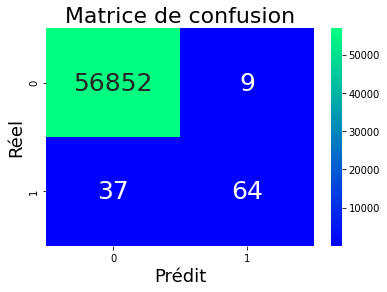

------------------------------ REGRESSION LOGISTIQUE PAR OPTIMISATION DES HYPERPARAMETRES ------------------------------
les meilleurs hyperparamètres pour la regression logistique sont :{'C': 10, 'penalty': 'l2'}
Precision : 0.87671
Recall : 0.63366
F1 : 0.73563
roc_auc_score : 0.81675
metrique personnalisée (MP): 0.7381002456934613 
\\Matrice de confusion ///:- 
 [[56852     9]
 [   37    64]]


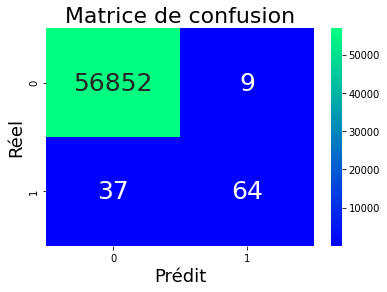

In [19]:

df = pd.read_csv('creditcard.csv').astype(np.float32)
colonnes_X=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

colonnes_Y=['Class']
Sc=StandardScaler()
Amount=df["Amount"].values
df["Amount"]=Sc.fit_transform(Amount.reshape(-1,1))
Time=df["Time"].values
df["Time"]=Sc.fit_transform(Time.reshape(-1,1))

x = df.drop('Class', axis=1) #données
y = df['Class'] #classe

#découpage du dataset 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
#reglog par défault
print("-"*30,"REGRESSION LOGISTIQUE PAR DEFAULT",30*"-")
reg_log(X_train,Y_train,X_test,Y_test)
#reglog_opti
print("-"*30,"REGRESSION LOGISTIQUE PAR OPTIMISATION DES HYPERPARAMETRES",30*"-")
reg_log_opti(X_train,Y_train,X_test,Y_test)
